<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine_Learning_Algorithms-2021/blob/main/01-Minimum-Distance-Classifier/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# By Miguel Ángel

# Importing libraries

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creating 2 groups of data with sorted numbers and 3 classes
# 200 to training; 10 to testing

training_data, labels = make_blobs(n_samples = 200, centers = 3, cluster_std = 0.5, random_state = 2)
test_data, labels_test = make_blobs(n_samples = 10, centers = 3, cluster_std = 0.5, random_state = 2)

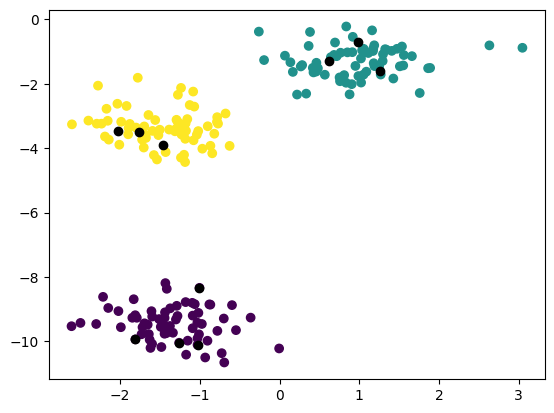

In [3]:
# Plotting created points (210)

plt.scatter(training_data[:,0], training_data[:,1], c = labels)
plt.scatter(test_data[:,0], test_data[:,1], c = "black")
plt.show()

In [4]:
# Mean vector (centroid) of every class

Vector0 = []; Vector1 = []; Vector2 = []; X=0; Y=0; mean = []; Vec = []
Vector_Mean = np.zeros((3,2),dtype=np.float32); bec = []; flag = 0

for i in range(len(training_data)):
  if labels[i] == 0:
    Vector0.append(training_data[i])
  elif labels[i] == 1:
    Vector1.append(training_data[i])
  elif labels[i] == 2:
    Vector2.append(training_data[i])

Vec = [Vector0,Vector1,Vector2]

for j in Vec:
  for i in j:
    X = X + i[0]
    Y = Y + i[1]
  bec = np.array((X/len(j), Y/len(j)))
  Vector_Mean[flag] = bec
  flag += 1
  X = 0 ; Y = 0

print("Centroids (Mean Vector): \n")
print(Vector_Mean)

Centroids (Mean Vector): 

[[-1.357591  -9.448546 ]
 [ 0.9723806 -1.3019181]
 [-1.4685758 -3.364672 ]]


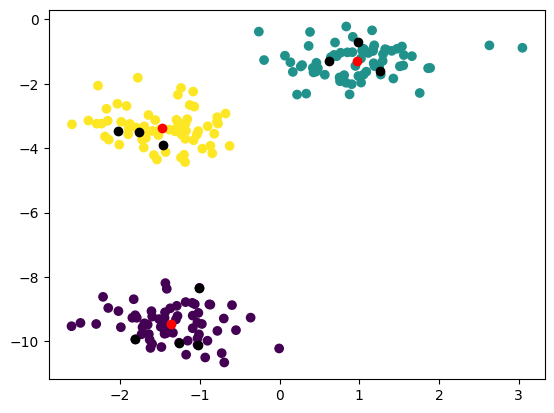

In [5]:
# Plotting centroids

plt.scatter(training_data[:,0], training_data[:,1], c = labels)
plt.scatter(test_data[:,0], test_data[:,1], c = "black" )
plt.scatter(Vector_Mean[:,0],Vector_Mean[:,1], c = "red")
plt.show()

In [6]:
# function to calculate euclidean distance and minimum distance

def DistanciasEuclidianas(VectorPromedios, DatosEntrenamiento):
  d = 0; Distance = []; Minimum_Dist = []
  for j in VectorPromedios:
    for i in DatosEntrenamiento:
      d = (i[0] - j[0])*(i[0] - j[0]) + (i[1] - j[1])*(i[1] - j[1])
      Distance.append(np.sqrt(d))
      d = 0
    Minimum_Dist.append(min(Distance))
  return Distance, Minimum_Dist

In [7]:
# Calculating distances

Distancias, Distancias_Mínimas = DistanciasEuclidianas(Vector_Mean, training_data)
DistanciasTest, Distancias_MínimasTest = DistanciasEuclidianas(Vector_Mean, test_data)

In [8]:
# Matrix with the distance of every centroid to the not labeled points

p = 0; distance_matrix = np.zeros((10,3),dtype=np.float32)

for i in range(3):
  for j in range(10):
    distance_matrix [j][i] = DistanciasTest[p]
    p += 1

print("Distance Matrix \n")
print(distance_matrix )

Distance Matrix 

[[9.050569   0.5959738  3.616883  ]
 [0.5999921  9.018995   6.6790447 ]
 [8.282357   0.4102014  3.2563734 ]
 [5.950912   3.5155268  0.3281125 ]
 [1.16787    7.3059583  4.9923277 ]
 [0.7334649  9.026789   6.75379   ]
 [8.3955765  0.3533013  2.9440677 ]
 [5.561878   3.5530171  0.52303815]
 [6.0149193  3.7056258  0.57316935]
 [0.6644029  9.071027   6.580123  ]]


In [9]:
# Prediction of class to every point

predicted_labels = np.zeros((10,4),dtype=np.float32); k=0

for i in distance_matrix:
  if ( i[0] < i[1] ) & ( i[0] < i[2] ):
    predicted_labels[k][3] = 0
  elif ( i[1] < i[0] ) & ( i[1] < i[2] ):
    predicted_labels[k][3] = 1
  else:
    predicted_labels[k][3] = 2
  k += 1

for ii in range(3):
  for jj in range(10):
    predicted_labels[jj][ii] = distance_matrix[jj][ii]

print("Matrix with distance and label \n")
print(predicted_labels)

Matrix with distance and label 

[[9.050569   0.5959738  3.616883   1.        ]
 [0.5999921  9.018995   6.6790447  0.        ]
 [8.282357   0.4102014  3.2563734  1.        ]
 [5.950912   3.5155268  0.3281125  2.        ]
 [1.16787    7.3059583  4.9923277  0.        ]
 [0.7334649  9.026789   6.75379    0.        ]
 [8.3955765  0.3533013  2.9440677  1.        ]
 [5.561878   3.5530171  0.52303815 2.        ]
 [6.0149193  3.7056258  0.57316935 2.        ]
 [0.6644029  9.071027   6.580123   0.        ]]


In [10]:
# Comparison between predictions and true labels

Aciertos = 0; Errores = 0
for i in range(10):
  if predicted_labels[i][3] == labels_test[i]:
    Aciertos += 1
  else:
    Errores += 1

print("Goods: " + str(Aciertos) + " \n" )
print("Errors: " + str(Errores))

Goods: 10 

Errors: 0
